## Application test

* testing the performance of the trained network with the real input

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_gray_scale_frames(path, shape, dtype='float32'):
    cap = cv2.VideoCapture(path)
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print("The initial [width, height] of the frames:",(frameWidth, frameHeight))
    frameNeed = shape[2]
    fc=0
    ret=True
    buf = np.empty((frameNeed, shape[1], shape[0]), dtype)
    if frameNeed > frameCount:
        print("Warning: the number of total frames is",frameCount)
        frameNeed = frameCount
    resX = (frameWidth - shape[0])//2
    resY = (frameHeight- shape[1])//2
    while (fc < frameNeed and ret):
        ret, buff = cap.read()
        buff = buff[resY:resY+shape[1],resX:resX+shape[0],:]
        buf[fc]=np.dot(buff[...,:3], [0.2989, 0.5870, 0.1140]).astype(dtype)
        fc += 1
    return buf

def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

data = get_gray_scale_frames('../util/IMG_3747.MOV',[572,572,200])



The initial [width, height] of the frames: (1080, 1920)


<IPython.core.display.Javascript object>


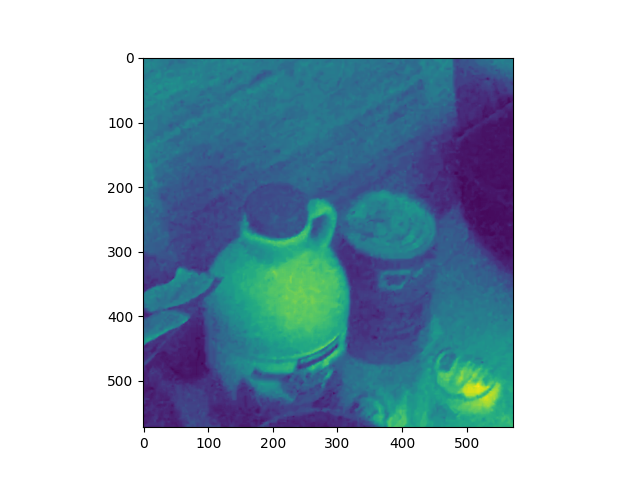

In [49]:
fig,ax = plt.subplots()
ax.imshow(data[140])
plt.show()

In [1]:
import sys
sys.path.insert(1, '/home/tabris/flShrine/dOD/tf_model')
import numpy as np
import tensorflow as tf
from model import *

m = mynet(input_shape=(572,572,6),padding = 'valid', dtype='float32', drop_rate=0.2)
m.buildNet()
m.net.load_weights('../data/unet_test_ckpt.h5')

(1, 572, 572, 200)


<IPython.core.display.Javascript object>


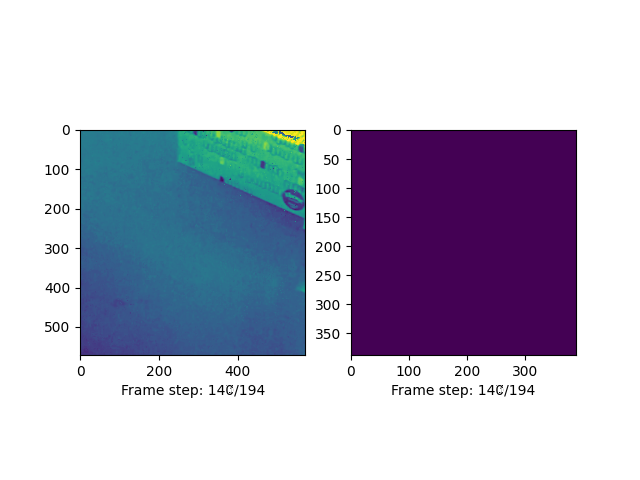

In [ ]:
def update(i, data, fg, ax, ntrail):
    label = 'Frame step: {0}/{1}'.format(i+1, ntrail)
    fg.set_data(data)
    ax.set_xlabel(label)
    return fg, ax

#adjust the input shape
x = np.swapaxes(np.array([data]), 1, 2)
x = np.swapaxes(x, 2, 3)
print(x.shape)

#feeding to the model and record the prediction
import matplotlib.pyplot as plt
%matplotlib notebook
ntrials = x.shape[3]-6
predict = []
fig,(ax1,ax2) = plt.subplots(1,2)


for i in range(ntrials):
    xx = x[:,:,:,i:i+6]
    img = x[0,:,:,i+5]
    pred = m.predict(xx)[0,:,:,0]
    #predict.append(pred)
    if i==0:
        fg1=ax1.imshow(x[0,:,:,i+5])
        fg2=ax2.imshow(pred)
    plt.pause(0.05)
    fig.canvas.draw()
    update(i, img, fg1, ax1, ntrials)
    update(i, pred, fg2, ax2, ntrials)
plt.show()